start to see the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df=pd.read_csv(r"D:\pythonfiles\weather\weather_classification_data.csv")

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [5]:
df.sample()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
5550,35.0,48,4.5,4.0,clear,1024.97,8,Summer,5.0,coastal,Sunny


In [6]:
df.shape

(13200, 11)

In [7]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

correct temperature

In [10]:
# for i in df['Temperature']:
#     if i<0:
#         df[i]=df[i].mean()
# df['Temperature']=df['Temperature'].apply(lambda x:x if x>=0 else None)
pos=df[df['Temperature']>0]['Temperature'].mean()
df['Temperature']=df['Temperature'].where(df['Temperature']>=0,pos)

In [11]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.000000,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.000000,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.000000,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.000000,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.000000,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.000000,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,25.155297,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.000000,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.000000,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


make as int

In [12]:
df.Temperature=df.Temperature.astype(int)
df['Wind Speed']=df['Wind Speed'].astype(int)
df['Precipitation (%)']=df['Precipitation (%)'].astype(int)
df['Atmospheric Pressure']=df['Atmospheric Pressure'].astype(int)
df['Visibility (km)']=df['Visibility (km)'].astype(int)


In [13]:
df.dtypes

Temperature              int64
Humidity                 int64
Wind Speed               int64
Precipitation (%)        int64
Cloud Cover             object
Atmospheric Pressure     int64
UV Index                 int64
Season                  object
Visibility (km)          int64
Location                object
Weather Type            object
dtype: object

analysis the unique

In [14]:
df['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [15]:
df['Cloud Cover']=df['Cloud Cover'].map({'partly cloudy':0, 'clear':1, 'overcast':2, 'cloudy':3}).astype(int)

In [16]:
df['Cloud Cover'].unique()

array([0, 1, 2, 3])

In [17]:
df["Season"].isna().sum()

np.int64(0)

In [18]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [19]:
df['Season']=df['Season'].map({'Winter':0, 'Spring':1, 'Summer':2, 'Autumn':3}).astype(int)

In [20]:
df['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [21]:
df['Location']=df['Location'].map({'inland':0, 'mountain':1, 'coastal':2}).astype(int)

In [22]:
df['Location'].unique()

array([0, 1, 2])

In [23]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [24]:
df['Weather Type']=df['Weather Type'].map({'Rainy':0, 'Cloudy':1, 'Sunny':2, 'Snowy':3}).astype(int)

In [25]:
df['Weather Type'].unique()

array([0, 1, 2, 3])

In [26]:
df.dtypes

Temperature             int64
Humidity                int64
Wind Speed              int64
Precipitation (%)       int64
Cloud Cover             int64
Atmospheric Pressure    int64
UV Index                int64
Season                  int64
Visibility (km)         int64
Location                int64
Weather Type            int64
dtype: object

<Axes: ylabel='Density'>

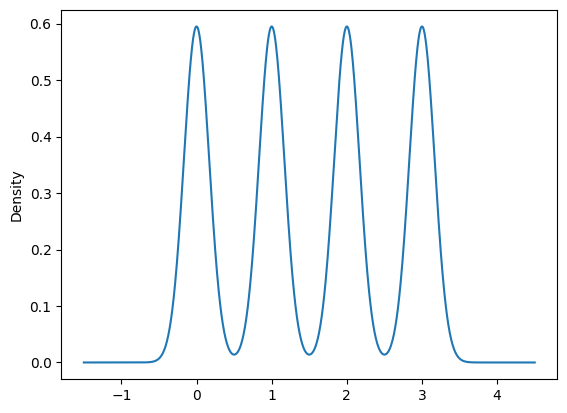

In [27]:
df['Weather Type'].plot.kde()


time to train the model

split the data for test and train

In [28]:
x=df.drop(columns='Weather Type')

In [29]:
x.head(2)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14,73,9,82,0,1010,2,0,3,0
1,39,96,8,71,0,1011,7,1,10,0


In [30]:
y=df['Weather Type']

In [31]:
y.head(2)

0    0
1    1
Name: Weather Type, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

using decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
mod_1=DecisionTreeClassifier()
mod_1.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
pre_1=mod_1.predict(x_test)
pre_1

array([0, 3, 1, ..., 3, 0, 0])

find accuracy

In [37]:
ac_d=accuracy_score(y_test,pre_1)
print(ac_d*100)

90.39393939393939


In [38]:
r2_d = r2_score(y_test, pre_1)
print(f'R² Score: {r2_d*100}')


R² Score: 80.28497610190313


In [39]:
mse_d=mean_squared_error(y_test,pre_1)
print(mse_d*100)

24.727272727272727


In [40]:
mae_d=mean_absolute_error(y_test,pre_1)
print(mae_d*100)

13.939393939393941


2 we use random forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
mod_2=RandomForestRegressor()

In [43]:
mod_2.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
pre_2=mod_2.predict(x_test)
pre_2
pre_2_0=pre_2.astype(int)
pre_2_0

array([0, 3, 1, ..., 3, 0, 0])

In [45]:
ac_r=accuracy_score(y_test,pre_2_0)
ac_r*100

85.66666666666667

In [46]:
r2_r = r2_score(y_test, pre_2)
print(f'R² Score: {r2_r*100}')


R² Score: 89.62762150404811


In [47]:
mse_r=mean_squared_error(y_test,pre_2)
print(mse_r*100)


13.009400000000001


In [48]:
mae_r=mean_absolute_error(y_test,pre_2)
print(mae_r*100)

11.833333333333334


so the random forest r2 value is greater than decision tree

3.we can take gaussianNB model

make a feature scale using standard scaler

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)

x_test_sc = sc.transform(x_test)

In [50]:
from sklearn.naive_bayes import GaussianNB

mod_3 = GaussianNB()

mod_3.fit(x_train,y_train)

GaussianNB()

In [51]:
pre_3 = mod_3.predict(x_test)
pre_3

array([0, 3, 1, ..., 3, 3, 3])

In [52]:
ac_g= accuracy_score(pre_3,y_test)
print(ac_g*100)

83.0909090909091


In [53]:
r2_g = r2_score(y_test,pre_3)
print(r2_g*100)

45.711202574725895


In [54]:
mse_g=mean_squared_error(y_test,pre_3)
mse_g*100

68.0909090909091

In [55]:
mae_g=mean_absolute_error(y_test,pre_3)
print(mae_g*100)

30.757575757575754


In [56]:
# from metpy.units import units
# import xarray as xr
# import pygrip

4.we can try the linear regression

In [57]:
from sklearn.linear_model import LinearRegression
mod_4 = LinearRegression()

mod_4.fit(x_train,y_train)

LinearRegression()

In [58]:
pre_4 = mod_4.predict(x_test)
pre_4
pre_4_0 = pre_4.astype(int)
pre_4_0

array([1, 2, 2, ..., 1, 1, 2])

In [59]:
ac_l=accuracy_score(y_test,pre_4_0)
ac_l*100

30.636363636363633

In [60]:
r2_l=r2_score(y_test,pre_4)
r2_l*100

25.40841760347646

In [61]:
mse_l=mean_squared_error(y_test,pre_4)
mse_l*100

93.55537231967142

In [62]:
mae_l=mean_absolute_error(y_test,pre_4)
mae_l*100

83.12065473550224

5.we can use SVM support vector machines

In [63]:
from sklearn.svm import SVC

mod_5=SVC()

mod_5.fit(x_train,y_train)

SVC()

In [64]:
pre_5 = mod_5.predict(x_test)
pre_5

array([0, 3, 1, ..., 3, 3, 0])

In [65]:
ac_svc=accuracy_score(y_test,pre_5)
ac_svc*100

75.09090909090908

In [66]:
r2_svc=r2_score(y_test,pre_5)
r2_svc*100

4.6382361203574085

In [67]:
mse_svc=mean_squared_error(y_test,pre_5)
mse_svc*100

119.60606060606061

In [68]:
mae_svc=mean_absolute_error(y_test,pre_5)
mae_svc*100

50.090909090909086

so we can plot the diagram to find the best model

In [69]:
model_name =np.array(['Decision Tree','Random Forest Regressor','GaussianNB','Linear Regression','Support Vector Cluster'])
y_axis=np.array([0,25,50,75,100,125,150])

ac_value=np.array([ac_d*100,ac_r*100,ac_g*100,ac_l*100,ac_svc*100])
print(ac_value)
     
r2_value=np.array([r2_d*100,r2_r*100,r2_g*100,r2_l*100,r2_svc*100])
print(r2_value)

mse_value=np.array([mse_d*100,mse_r*100,mse_g*100,mse_l*100,mse_svc*100])
print(mse_value)

mae_value=np.array([mae_d*100,mae_r*100,mae_g*100,mae_l*100,mae_svc*100])
print(mae_value)

[90.39393939 85.66666667 83.09090909 30.63636364 75.09090909]
[80.2849761  89.6276215  45.71120257 25.4084176   4.63823612]
[ 24.72727273  13.0094      68.09090909  93.55537232 119.60606061]
[13.93939394 11.83333333 30.75757576 83.12065474 50.09090909]


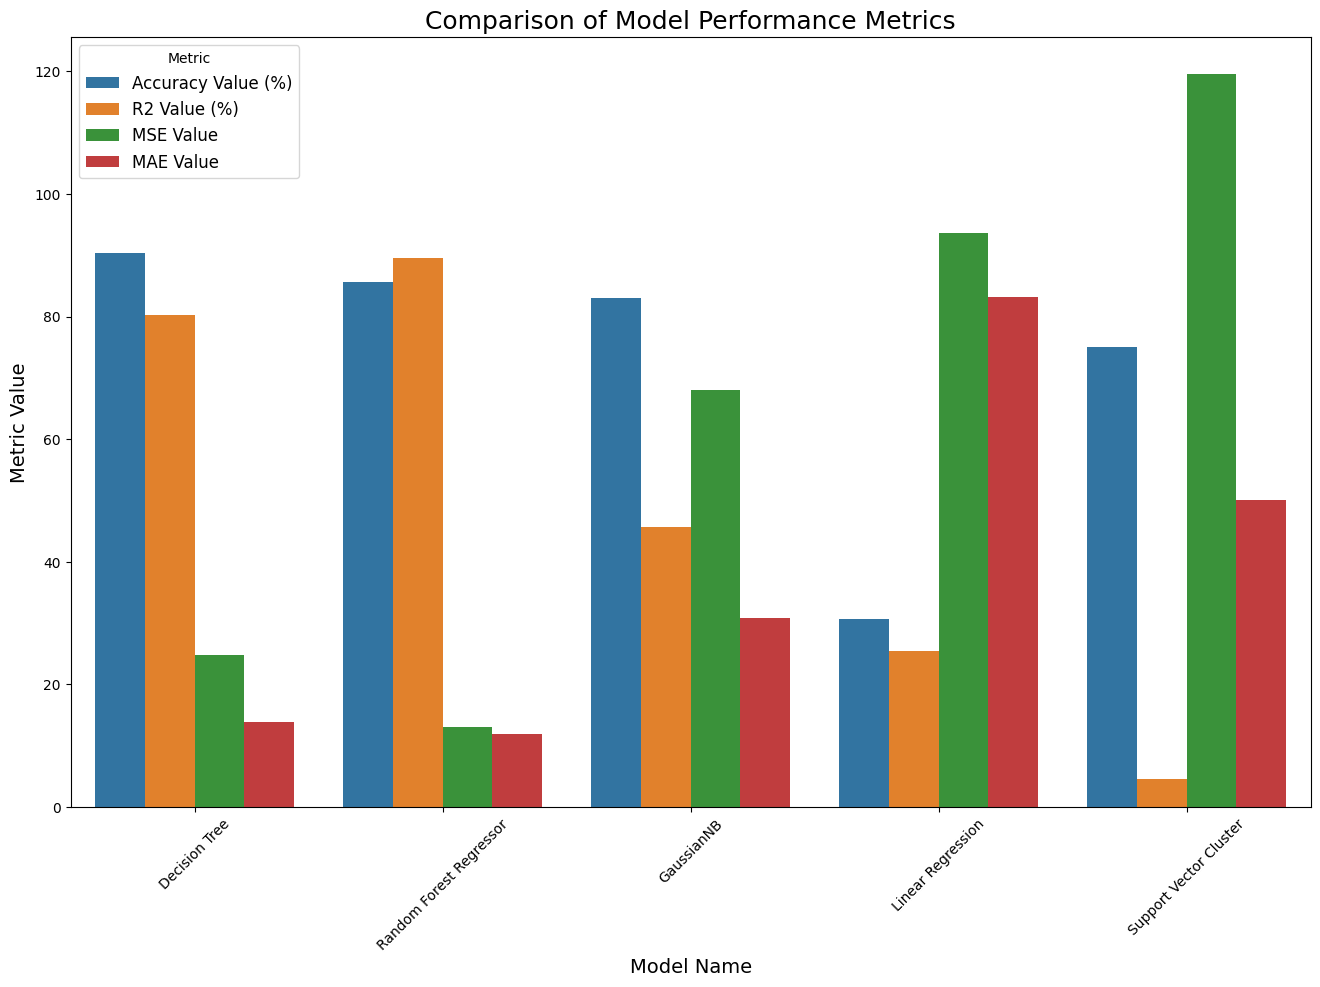

In [70]:

# Create a DataFrame for easier plotting
data_c = pd.DataFrame({
    'Model Name': model_name,
    'Accuracy Value (%)': ac_value,
    'R2 Value (%)': r2_value,
    'MSE Value': mse_value,
    'MAE Value': mae_value
})

# Set up the figure size
plt.figure(figsize=(16, 10))

# Melt the DataFrame to long-form for easier use with Seaborn
data_melted = pd.melt(data_c, id_vars='Model Name', 
                      value_vars=['Accuracy Value (%)', 'R2 Value (%)', 'MSE Value', 'MAE Value'], 
                      var_name='Metric', value_name='Value')

# Plot the data
sns.barplot(x='Model Name', y='Value', hue='Metric', data=data_melted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Comparison of Model Performance Metrics', fontsize=18)
plt.xlabel('Model Name', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)

# Show the legend and the plot
plt.legend(title='Metric', fontsize=12)
plt.show()


C:\Users\vaith\AppData\Local\Temp\ipykernel_30328\241714724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='Accuracy Value (%)', data=data_1, palette='muted', alpha=0.7)


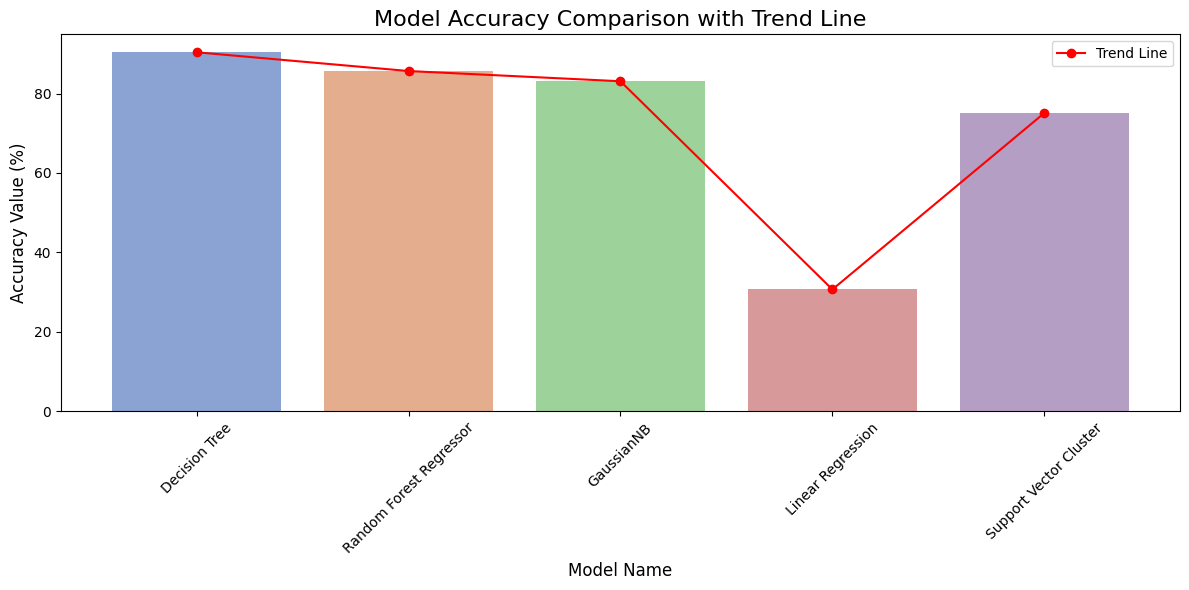

In [71]:

data_1 = pd.DataFrame({
    'Model Name': model_name,
    'Accuracy Value (%)': ac_value
})

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Model Name', y='Accuracy Value (%)', data=data_1, palette='muted', alpha=0.7)

# Plot the line above the bars to show the ups and downs
plt.plot(data_1['Model Name'], data_1['Accuracy Value (%)'], marker='o', color='r', label='Trend Line')

# Add a title and labels
plt.title('Model Accuracy Comparison with Trend Line', fontsize=16)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Accuracy Value (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend and the plot
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\vaith\AppData\Local\Temp\ipykernel_30328\134816752.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='R2 Value (%)', data=data, palette='muted', alpha=0.7)


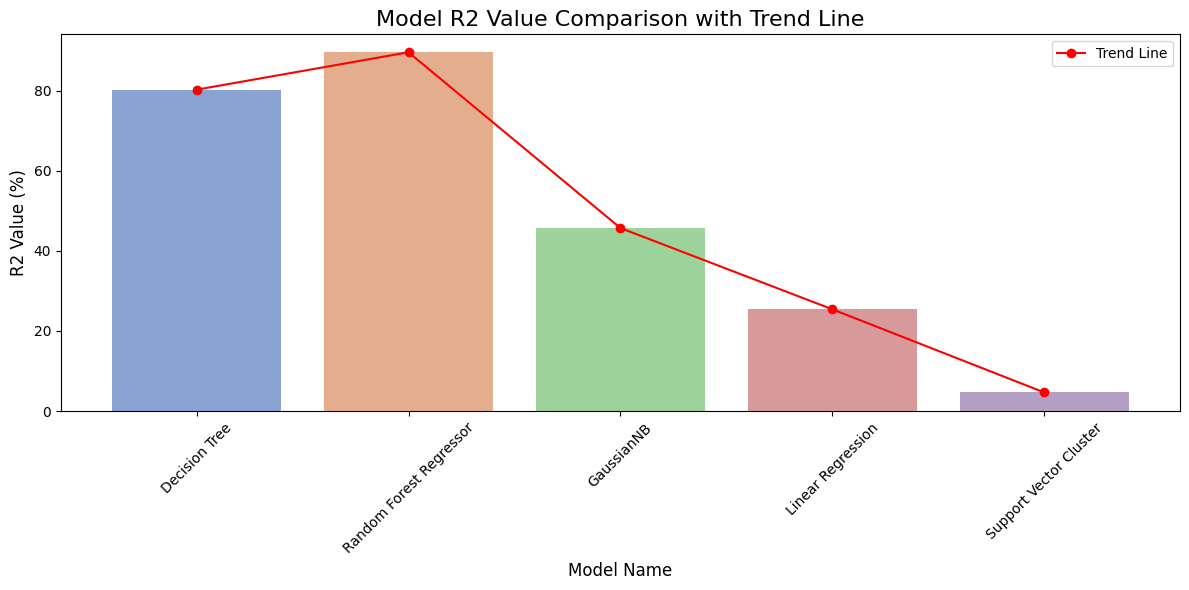

In [72]:

# Create a DataFrame
data = pd.DataFrame({
    'Model Name': model_name,
    'R2 Value (%)': r2_value
})

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Model Name', y='R2 Value (%)', data=data, palette='muted', alpha=0.7)

# Plot the line above the bars to show the ups and downs
plt.plot(data['Model Name'], data['R2 Value (%)'], marker='o', color='r', label='Trend Line')

# Add a title and labels
plt.title('Model R2 Value Comparison with Trend Line', fontsize=16)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('R2 Value (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend and the plot
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\vaith\AppData\Local\Temp\ipykernel_30328\2827853929.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='MSE Value', data=data_2, palette='muted', alpha=0.7)


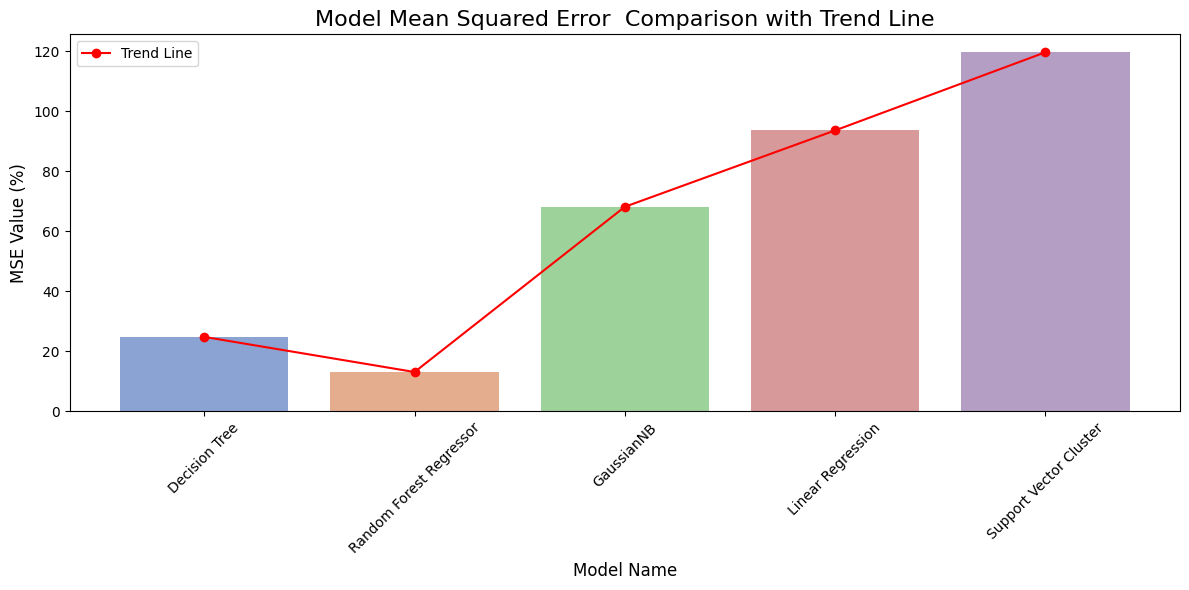

In [73]:

# Create a DataFrame
data_2 = pd.DataFrame({
    'Model Name': model_name,
     'MSE Value': mse_value
})

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Model Name', y='MSE Value', data=data_2, palette='muted', alpha=0.7)

# Plot the line above the bars to show the ups and downs
plt.plot(data_2['Model Name'], data_2['MSE Value'], marker='o', color='r', label='Trend Line')

# Add a title and labels
plt.title('Model Mean Squared Error  Comparison with Trend Line', fontsize=16)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('MSE Value (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend and the plot
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\vaith\AppData\Local\Temp\ipykernel_30328\1022609578.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Name', y='MAE Value', data=data_3, palette='muted', alpha=0.7)


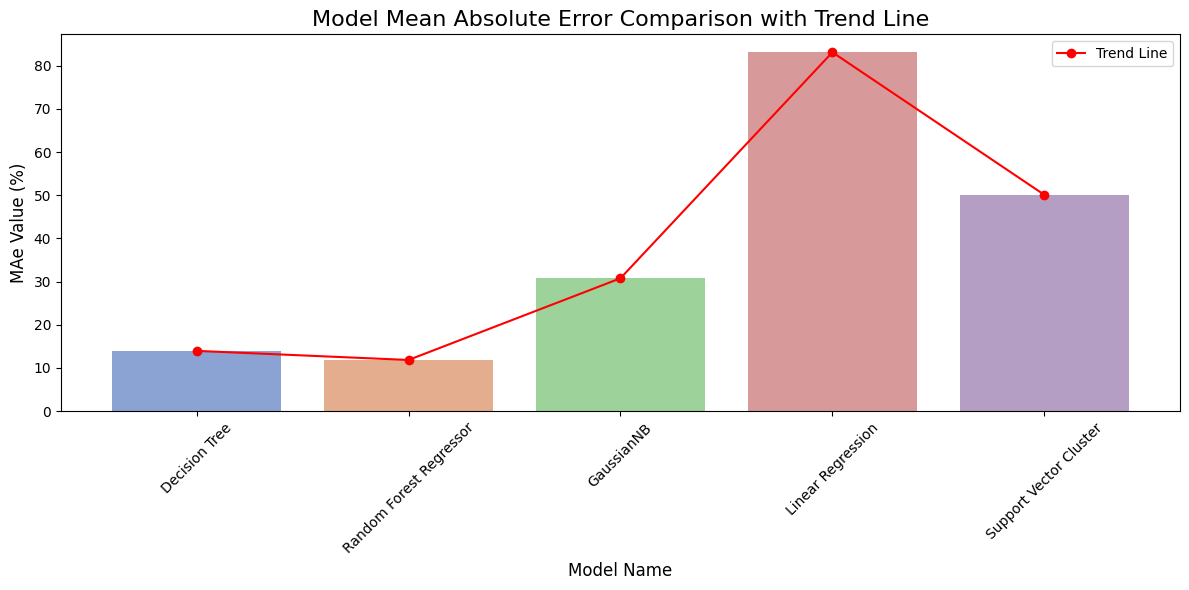

In [74]:

# Create a DataFrame
data_3 = pd.DataFrame({
    'Model Name': model_name,
    'MAE Value': mae_value
})

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Model Name', y='MAE Value', data=data_3, palette='muted', alpha=0.7)

# Plot the line above the bars to show the ups and downs
plt.plot(data_3['Model Name'], data_3['MAE Value'], marker='o', color='r', label='Trend Line')

# Add a title and labels
plt.title('Model Mean Absolute Error Comparison with Trend Line', fontsize=16)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('MAe Value (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend and the plot
plt.legend()
plt.tight_layout()
plt.show()


as this graph diagram conculed the RandomForestRegessor is best to fit for the weather dataset

create a dictinory

In [ ]:
try:
    temp = int(input("Enter temperature : "))
    hum = int(input("Enter Humidity : "))
    ws = int(input("Enter wind speed : "))
    pre = int(input("Enter Precipitation : "))
    cc = int(input("Enter Cloud Cover	 ('partly cloudy':0, 'clear':1, 'overcast':2, 'cloudy':3): "))
    at = int(input("Enter Atmospheric Pressure : "))
    uv = int(input("Enter UV Index : "))
    sea = int(input("Enter Season ('Winter':0, 'Spring':1, 'Summer':2, 'Autumn':3) : "))
    vis = int(input("Enter Visibility (km)	 : "))
    ll = int(input("Enter Location	('inland':0, 'mountain':1, 'coastal':2) : "))




    # Create a sample from the input
    cd = np.array([[temp,hum,ws,pre,cc,at,uv,sea,vis,ll]])
    # Scale the input data using the same scaler
    # person_scaled = scaler.transform(cd)
    # Predict the outcome
    result = mod_2.predict(cd)

    # Display the result
    if result[0] == 0:
        print("The rainy")
    elif result[0]==1 :
        print("The cloudy.")
    elif result[0]==2:
        print("The sunny.")
    else:
        print("The snow")
        
except ValueError as e:
    print(f"Invalid input: {e}")

In [ ]:
import pickle

# Save trained model
with open("weather_model.pkl", "wb") as f:
    pickle.dump(mod_2, f)


NameError: name 'mod_2' is not defined

In [ ]:
df.to_csv('updated_csv',index=False)

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X


In [ ]:
y

In [ ]:
# Export the cleaned DataFrame to a CSV file in Jupyter Notebook
df.to_csv('cleaned_data.csv', index=True)
from IPython.display import FileLink

# Display a link to download the file
FileLink('cleaned_data.csv')


In [ ]:
data=pd.read_csv(r'C:\Users\vaith\Downloads\cleaned_data.xls')

In [ ]:
data

In [ ]:
# Export the cleaned DataFrame to a CSV file in Jupyter Notebook
data.to_csv('cleaned_data.csv', index=True)
from IPython.display import FileLink

# Display a link to download the file
FileLink('cleaned_data.csv')
